In [1]:
import json
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
con=pd.read_csv('contest_28Feb2021.csv')

In [3]:
con.dtypes

Unnamed: 0              int64
id                      int64
name                   object
type                   object
phase                  object
frozen                   bool
durationSeconds         int64
startTimeSeconds        int64
relativeTimeSeconds     int64
dtype: object

In [4]:
con['date']=pd.to_datetime(con['startTimeSeconds'],unit='s')

In [5]:
con.set_index('date',inplace=True)
con

,Unnamed: 0,id,name,type,phase,frozen,durationSeconds,startTimeSeconds,relativeTimeSeconds
date,,,,,,,,,
2021-03-21 10:10:00,0,1482,Технокубок 2021 - Финал,CF,BEFORE,False,10800,1616321400,-1807853
2021-03-09 14:35:00,1,1488,Kotlin Heroes: Episode 6,ICPC,BEFORE,False,9000,1615300500,-786953
2021-03-06 14:05:00,2,1493,Codeforces Round #705 (Div. 2),CF,BEFORE,False,8100,1615039500,-525953
2021-03-02 14:35:00,3,1494,Educational Codeforces Round 105 (Rated for Di...,ICPC,BEFORE,False,7200,1614695700,-182153
2021-03-02 13:35:00,4,1489,Kotlin Heroes: Practice 6,ICPC,BEFORE,False,604800,1614692100,-178553
...,...,...,...,...,...,...,...,...,...
2010-03-20 16:00:00,1418,5,Codeforces Beta Round #5,ICPC,FINISHED,False,7200,1269100800,345412746
2010-03-12 12:00:00,1419,4,Codeforces Beta Round #4 (Div. 2 Only),ICPC,FINISHED,False,7200,1268395200,346118346
2010-03-07 12:00:00,1420,3,Codeforces Beta Round #3,ICPC,FINISHED,False,7200,1267963200,346550346


In [6]:
data=con[['id','name','type','phase']]
data

,id,name,type,phase
date,,,,
2021-03-21 10:10:00,1482,Технокубок 2021 - Финал,CF,BEFORE
2021-03-09 14:35:00,1488,Kotlin Heroes: Episode 6,ICPC,BEFORE
2021-03-06 14:05:00,1493,Codeforces Round #705 (Div. 2),CF,BEFORE
2021-03-02 14:35:00,1494,Educational Codeforces Round 105 (Rated for Di...,ICPC,BEFORE
2021-03-02 13:35:00,1489,Kotlin Heroes: Practice 6,ICPC,BEFORE
...,...,...,...,...
2010-03-20 16:00:00,5,Codeforces Beta Round #5,ICPC,FINISHED
2010-03-12 12:00:00,4,Codeforces Beta Round #4 (Div. 2 Only),ICPC,FINISHED
2010-03-07 12:00:00,3,Codeforces Beta Round #3,ICPC,FINISHED


In [7]:
data['dayOfWeek']=data.index.dayofweek
data['Y']=data.index.year
data['H']=data.index.hour
data

C:\Users\papa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\papa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\papa\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,id,name,type,phase,dayOfWeek,time,Y,H,M
date,,,,,,,,,
2021-03-21 10:10:00,1482,Технокубок 2021 - Финал,CF,BEFORE,6,10:10:00,2021,10,10
2021-03-09 14:35:00,1488,Kotlin Heroes: Episode 6,ICPC,BEFORE,1,14:35:00,2021,14,35
2021-03-06 14:05:00,1493,Codeforces Round #705 (Div. 2),CF,BEFORE,5,14:05:00,2021,14,5
2021-03-02 14:35:00,1494,Educational Codeforces Round 105 (Rated for Di...,ICPC,BEFORE,1,14:35:00,2021,14,35
2021-03-02 13:35:00,1489,Kotlin Heroes: Practice 6,ICPC,BEFORE,1,13:35:00,2021,13,35
...,...,...,...,...,...,...,...,...,...
2010-03-20 16:00:00,5,Codeforces Beta Round #5,ICPC,FINISHED,5,16:00:00,2010,16,0
2010-03-12 12:00:00,4,Codeforces Beta Round #4 (Div. 2 Only),ICPC,FINISHED,4,12:00:00,2010,12,0
2010-03-07 12:00:00,3,Codeforces Beta Round #3,ICPC,FINISHED,6,12:00:00,2010,12,0


In [8]:
data19=data[data['Y']==2019]
data20=data[data['Y']==2020]

In [9]:
data19

,id,name,type,phase,dayOfWeek,time,Y,H,M
date,,,,,,,,,
2019-12-29 14:05:00,1270,Good Bye 2019,CF,FINISHED,6,14:05:00,2019,14,5
2019-12-28 17:05:00,1283,Codeforces Round #611 (Div. 3),ICPC,FINISHED,5,17:05:00,2019,17,5
2019-12-27 14:40:00,1279,Educational Codeforces Round 79 (Rated for Div...,ICPC,FINISHED,4,14:40:00,2019,14,40
2019-12-24 14:35:00,1282,Codeforces Round #610 (Div. 2),CF,FINISHED,1,14:35:00,2019,14,35
2019-12-21 11:05:00,1268,Codeforces Round #609 (Div. 1),CF,FINISHED,5,11:05:00,2019,11,5
...,...,...,...,...,...,...,...,...,...
2019-01-11 14:35:00,1101,Educational Codeforces Round 58 (Rated for Div...,ICPC,FINISHED,4,14:35:00,2019,14,35
2019-01-09 14:35:00,1102,Codeforces Round #531 (Div. 3),ICPC,FINISHED,2,14:35:00,2019,14,35
2019-01-05 16:35:00,1098,Codeforces Round #530 (Div. 1),CF,FINISHED,5,16:35:00,2019,16,35


In [10]:
data20

,id,name,type,phase,dayOfWeek,time,Y,H,M
date,,,,,,,,,
2020-12-30 14:35:00,1466,Good Bye 2020,CF,FINISHED,2,14:35:00,2020,14,35
2020-12-28 14:35:00,1469,Educational Codeforces Round 101 (Rated for Di...,ICPC,FINISHED,0,14:35:00,2020,14,35
2020-12-25 11:35:00,1468,"2020-2021 ICPC, NERC, Southern and Volga Russi...",ICPC,FINISHED,4,11:35:00,2020,11,35
2020-12-20 15:05:00,1411,Technocup 2021 - Elimination Round 3,CF,FINISHED,6,15:05:00,2020,15,5
2020-12-20 15:05:00,1464,"Codeforces Round #692 (Div. 1, based on Techno...",CF,FINISHED,6,15:05:00,2020,15,5
...,...,...,...,...,...,...,...,...,...
2020-01-14 14:35:00,1288,Educational Codeforces Round 80 (Rated for Div...,ICPC,FINISHED,1,14:35:00,2020,14,35
2020-01-10 14:05:00,1285,Codeforces Round #613 (Div. 2),CF,FINISHED,4,14:05:00,2020,14,5
2020-01-05 14:05:00,1286,Codeforces Round #612 (Div. 1),CF,FINISHED,6,14:05:00,2020,14,5


In [15]:
by_weekday19=data19.groupby(data19.index.dayofweek).count()
by_weekday20=data20.groupby(data20.index.dayofweek).count()

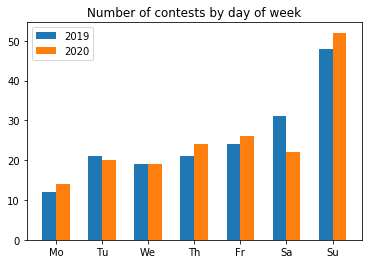

In [16]:
cat_par = ['Mo','Tu','We','Th','Fr','Sa','Su']
g1 = by_weekday19['Y']
g2 = by_weekday20['Y']
width = 0.3
x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='2019')
rects2 = ax.bar(x + width/2, g2, width, label='2020')
ax.set_title('Number of contests by day of week')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

In [17]:
by_time19=data19.groupby(data19['H']).count()
by_time20=data20.groupby(data20['H']).count()

In [18]:
s=pd.DataFrame([{'placeholder':0} for i in range(24)])

In [19]:
df1=pd.merge(s,by_time19['name'],left_index=True,right_index=True, how="outer")
df1=pd.merge(df1,by_time20['type'],left_index=True,right_index=True, how="outer")
df1.rename(columns={'name':'2019','type':'2020'}, inplace=True)
df1.fillna(0, inplace=True)
df1

,placeholder,2019,2020
0,0,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0
3,0,1.0,0.0
4,0,0.0,0.0
5,0,2.0,1.0
6,0,0.0,1.0
7,0,5.0,3.0
8,0,7.0,1.0
9,0,12.0,10.0


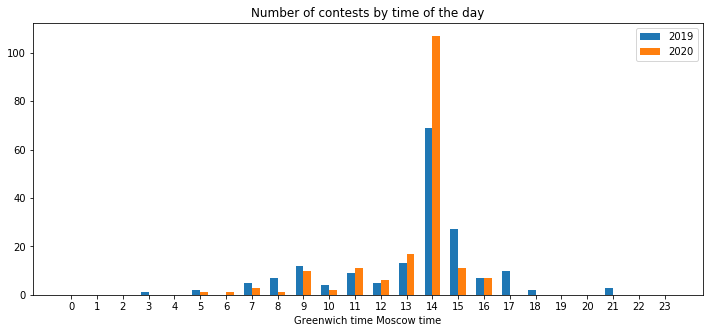

In [26]:
g1 = df1['2019']
g2 = df1['2020']
width = 0.3
x = df1.index
#fig, ax = plt.subplots()
fig, ax = plt.subplots( figsize=(12, 5))
rects1 = ax.bar(x - width/2, g1, width, label='2019')
rects2 = ax.bar(x + width/2, g2, width, label='2020')
ax.set_title('Number of contests by time of the day')
ax.set_xlabel('Greenwich time Moscow time')
ax.set_xticks(x)
#ax.set_xticklabels(cat_par)
ax.legend()

In [22]:
data20['time']=data20.index.time

C:\Users\papa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data20.groupby(data20['time']).count()

,id,name,type,phase,dayOfWeek,Y,H,M
time,,,,,,,,
05:00:00,1,1,1,1,1,1,1,1
06:05:00,1,1,1,1,1,1,1,1
07:05:00,3,3,3,3,3,3,3,3
08:05:00,1,1,1,1,1,1,1,1
09:00:00,2,2,2,2,2,2,2,2
09:05:00,3,3,3,3,3,3,3,3
09:20:00,1,1,1,1,1,1,1,1
09:35:00,4,4,4,4,4,4,4,4
10:05:00,1,1,1,1,1,1,1,1
